# 01. figure와 subplot

## figure 개요
    - 그려지는 그래프가 figure 객체 내에 존재하며, 그림을 그리는 종이라고 이해

## fig = plt.figure(figsize=(10, 6))
    - figure 명령을 사용하여 그 반환 값으로 figure 객체를 얻음
    - figsize=(10,6)
        - 그림 크기 : figsize 인수로 설정(크기와 비율을 지정)
        - 단위 : inch
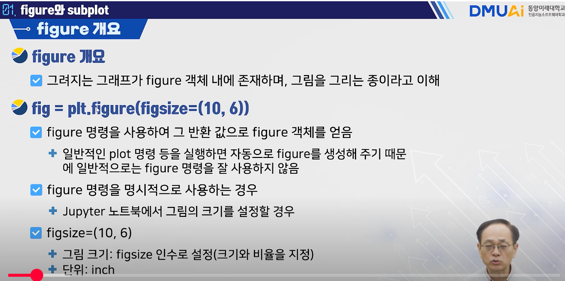

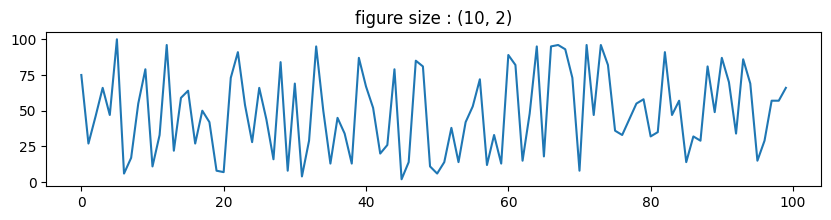

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

w, h = 10, 2
f1 = plt.figure(figsize=(w, h))
data = [random.randint(1, 100) for i in range(100)]
# print(data)
plt.plot(data) # plt.plot(range(len(data)), data)

plt.title(f"figure size : ({w}, {h})")
plt.show()

## show()

- 그림 그리기(rendering)
    - 시각화 명령을 실제로 차트로 렌더링(rendering)
    - 마우스 움직임 등의 이벤트를 기다리라는 지시

- 주피터 노트북
    - 셀단위로 플롯 명령을 자동 렌더링 해주므로 show() 구문이 필요 없음
    - show() 구분이 없다면(원하지 않은)
        - plot()등의 이전 구문의 반환 값이 표시

## figure 구조

- Axes : figure 내부의 부분 그림
- Axis : 가로축이나 세로축 등의 축

# 02. figure 내부 부분 그림 axes

## 방법

- plt.subplot()
- plt.subplots()
- fig.add_subplot()


## plt.subplot
- matplotlib.pyplot 모듈의 subplot() 함수
- 여러개의 그래프(axes)를 하나의 그림(figure)에 나타내도록
    - 그리드형태의 Axes객체들을 생성

### ax1 = plt.subplot(2, 1, 1)
- subplot(m, n, number)
- ax1 = plt.subplot('2 1 1')로도 가능 ( 단 단위만 가능 )
- 세 개의 인수
    - m, n : 전체 그리드 행렬의 모양을 지시하는 두 숫자
    - number : 인수가 네 개 중 어느 것인지를 의미하는 숫자 ( 첫 번째 부분그림을 가리키는 숫자가 0이 아니라 1임을 주의 )

### `plt.subplot(row, column, index)`

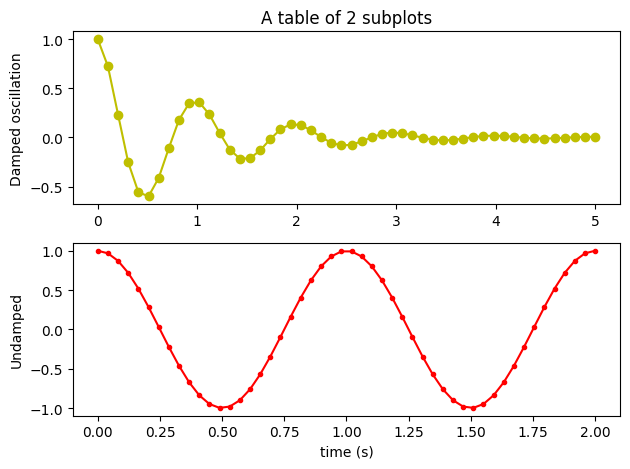

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0.0, 5.0) # num = 50 기본값
x2 = np.linspace(0.0, 2.0) # num = 50 기본값
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A table of 2 subplots')
plt.ylabel('Damped oscillation')

ax2 = plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout() # figure안의 Axes를 적당히 공간을 배분하여 그려달라는 함수
plt.show()

### plt.subplots() 개요

#### plt.subplots(rows, columns) 함수
- 여러개의 axes을 한 번에 생성하는 간단한 방법을 제공
- plt.subplots()는 행과 열의 개수를 지정하고 모든 axes를 반환

Figure(640x480)
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


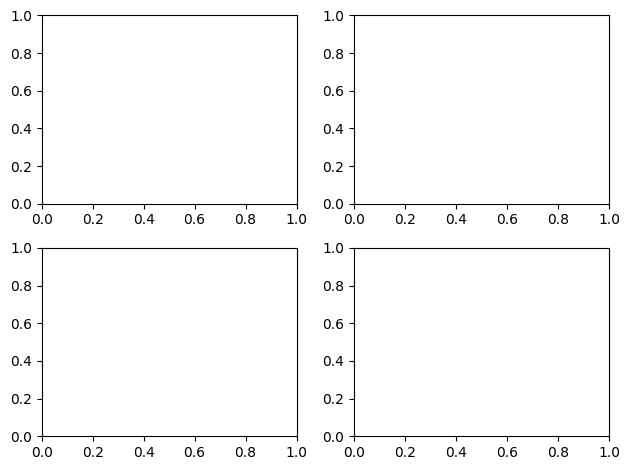

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2) # 2행 2열의 서브플롯

print(fig)
print(axes)

plt.tight_layout()
plt.show()

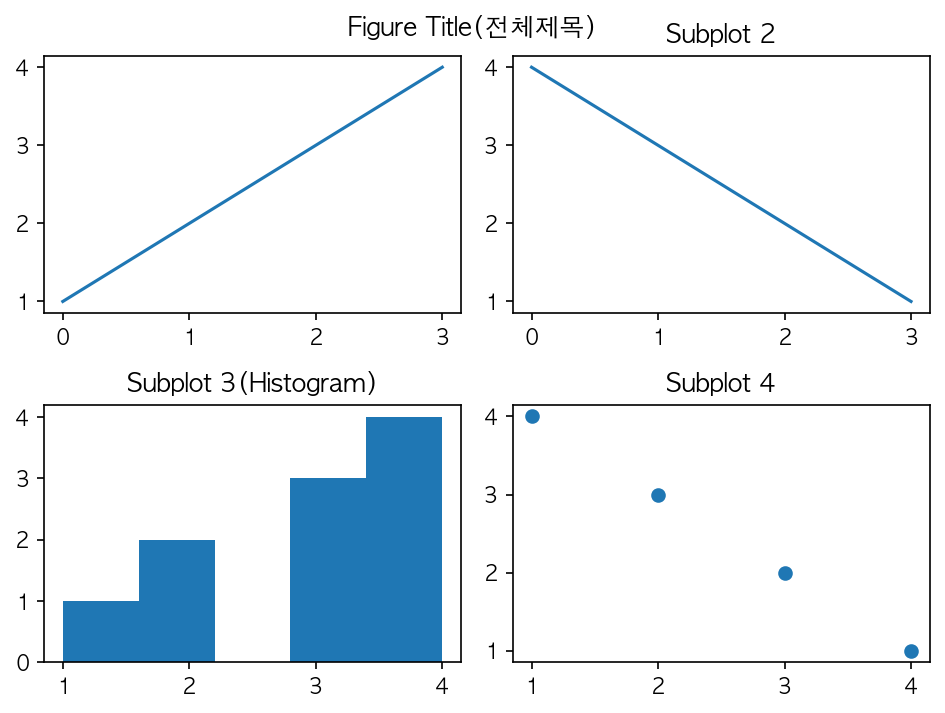

In [47]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.dpi'] = 150  # 기본값 100보다 높게 설정

fig, axes = plt.subplots(2, 2) # 2행 2열의 서브플롯

axes[0, 0].plot([1, 2, 3, 4])
axes[0, 1].set_title('Subplot 1')

axes[0, 1].plot([4, 3, 2, 1])
axes[0, 1].set_title('Subplot 2')

axes[1, 0].hist([1, 2, 2, 3, 3, 3, 4, 4, 4, 4], bins=5)
axes[1, 0].set_title('Subplot 3(Histogram)')

axes[1, 1].scatter([1, 2, 3, 4], [4, 3, 2, 1])
axes[1, 1].set_title('Subplot 4')

plt.tight_layout()
plt.suptitle('Figure Title(전체제목)')
plt.show()

### 부분 그림 간의 간격 조절하기

`plt.subplots_adjust(wspace=0, hspace=.05)`

0.2
0.2


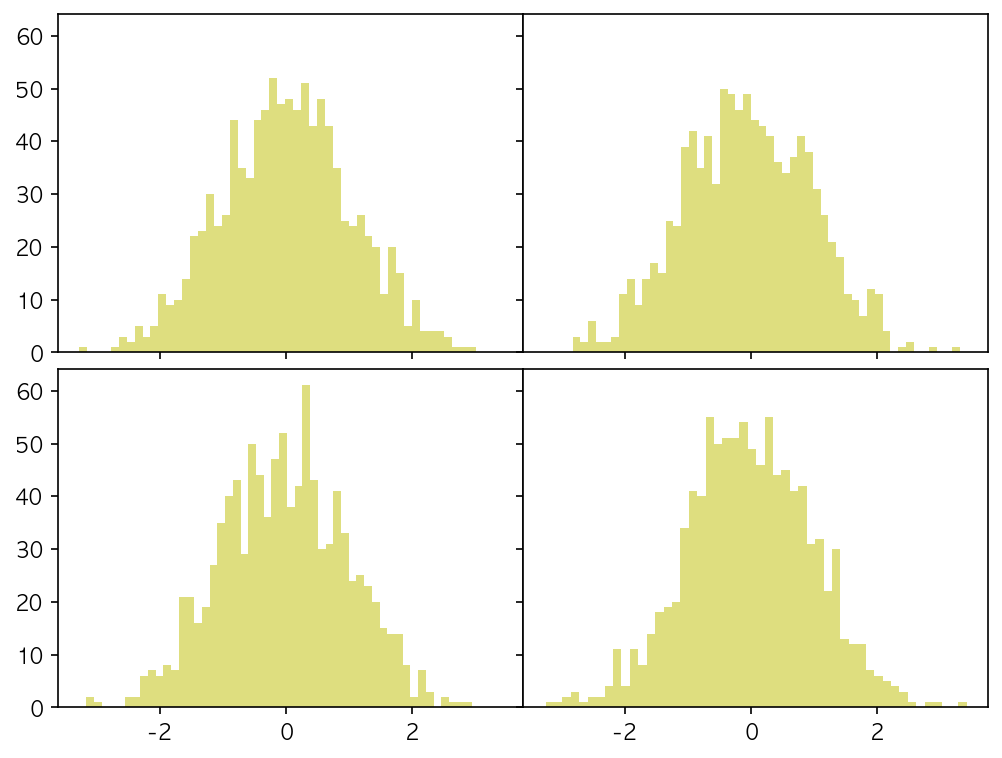

In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'AppleGothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 6))

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(1000), bins=50, color='y', alpha=0.5) # alpha는 투명도

print(plt.rcParams['figure.subplot.wspace']) # 0.2로 기본값이 설정되어있음, 20%를 의미
print(plt.rcParams['figure.subplot.hspace']) # 0.2로 기본값이 설정되어있음

# 적당한 공간 비우기, 코드 없는 것과 동일(기본 값): wspace=.2, hspace=.2
plt.subplots_adjust(wspace=0, hspace=.05) # .05 => 5%를 의미한다.
plt.show()

### plt.add_subplot() 개요
- axes를 하나씩 추가할 수 있도록 figure객체에 속한 메서드
- axes를 생성하고 반환하며, 인덱스를 이용하여 위치를 지정


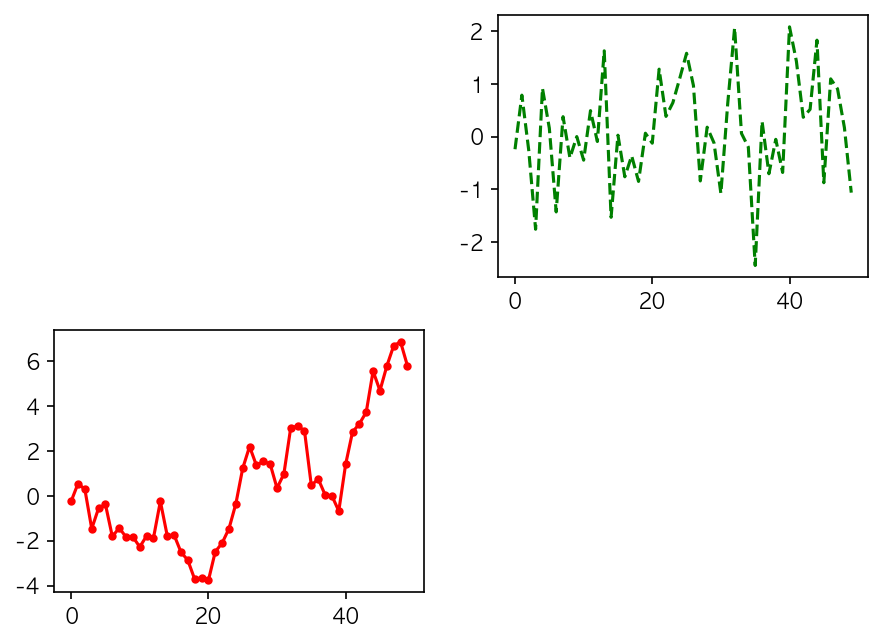

In [55]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 5))
data = np.random.randn(50) # 표준 정규분포의 난수 50개

ax2 = fig.add_subplot(2, 2, 2)
plt.plot(data, 'g--')

ax3 = fig.add_subplot(2, 2, 3)
plt.plot(data.cumsum(), 'r.-')

plt.show()